# Clustering Analysis:

In [185]:
import pandas as pd 
df = pd.read_csv("EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Preprocessing:

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [187]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [188]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# Statistical Summary:

In [189]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Histograms:

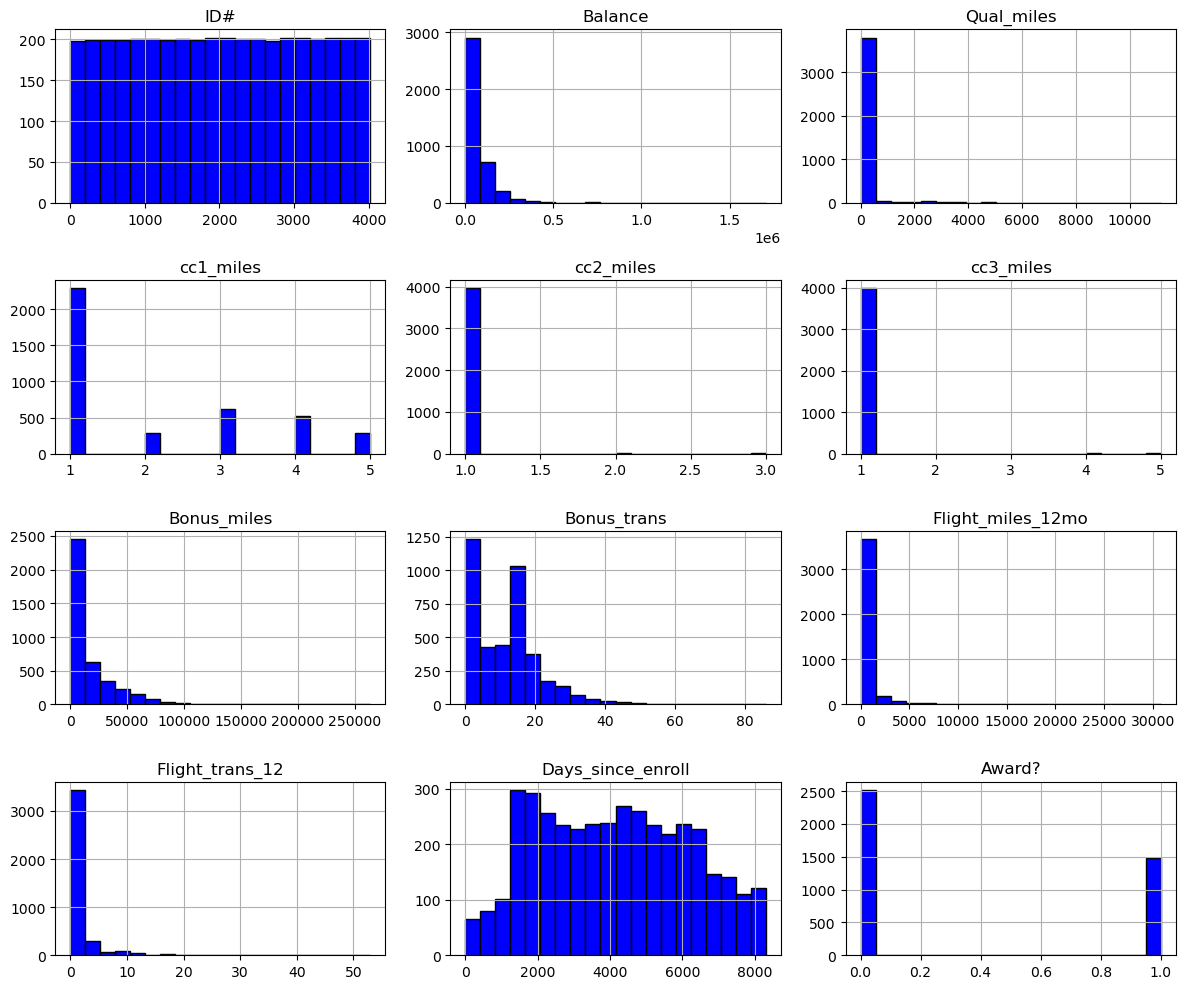

In [190]:
df.hist(figsize=(12,10),bins = 20,color ='blue',edgecolor = 'black')
plt.tight_layout()
plt.show()

# Box Plots:

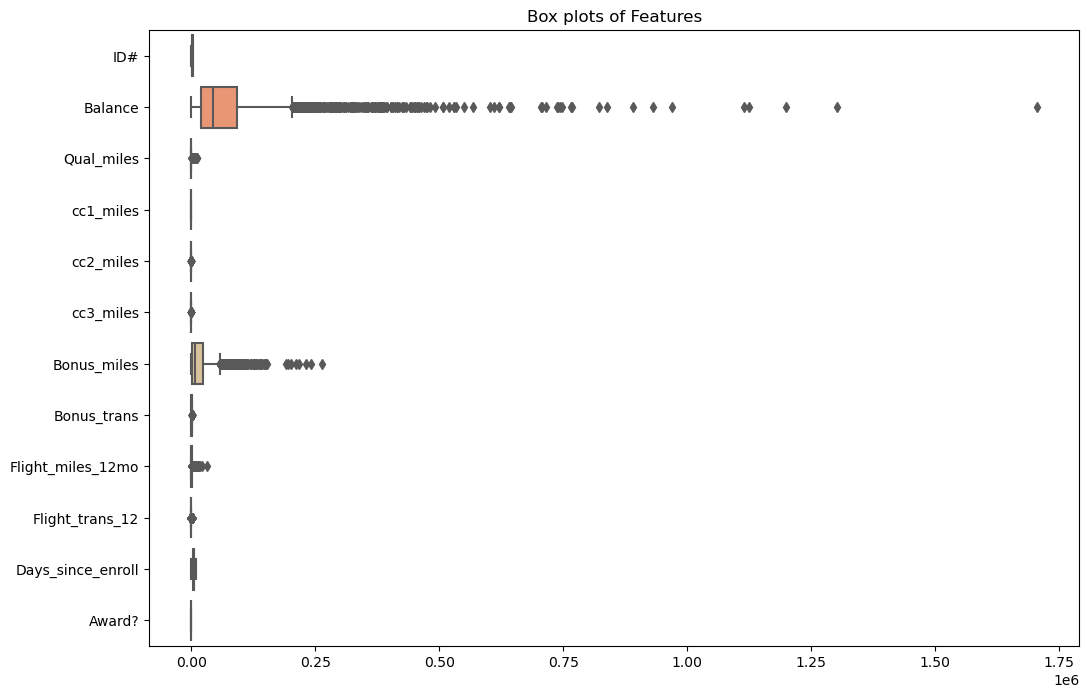

In [191]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,orient='h',palette='Set2')
plt.title("Box plots of Features")
plt.show()

# Implementing Clustering Algorithms:

# Hierarchical Clustering:

In [192]:
x = df.iloc[:,1:]
x.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [193]:
#single linkage method
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3,linkage ='single')

In [194]:
df["Hierarchical_single"]=cluster.fit_predict(x)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_single
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


# Visualization:

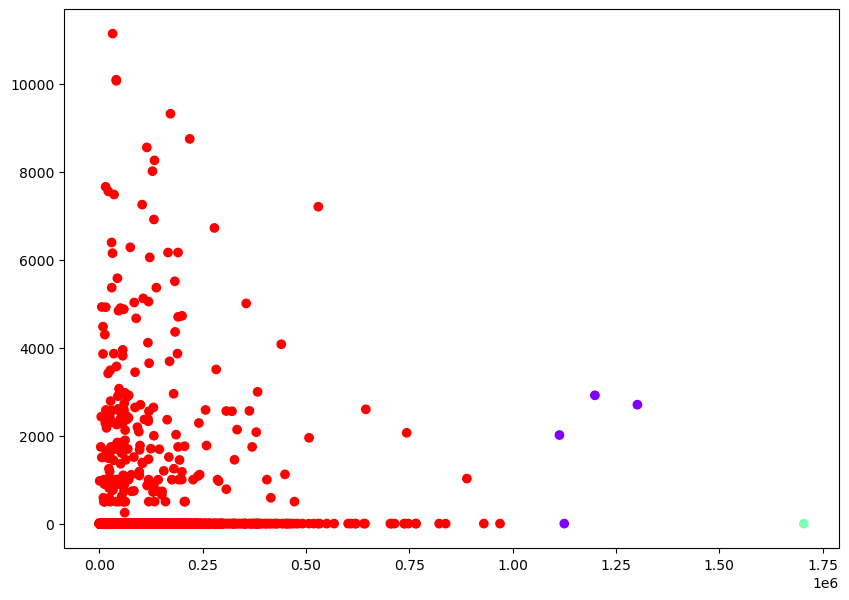

In [195]:
plt.figure(figsize = (10,7))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=cluster.labels_,cmap='rainbow')

In [196]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x,df['Hierarchical_single'])
print("Silhouette score of Hierarchical_single:",score.round(2))

Silhouette score of Hierarchical_single: 0.91


In [197]:
#complete linkage method
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5,linkage='complete')

In [198]:
df["Hierarchical_complete"]=cluster.fit_predict(x)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_single,Hierarchical_complete
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,4


# Visualization:

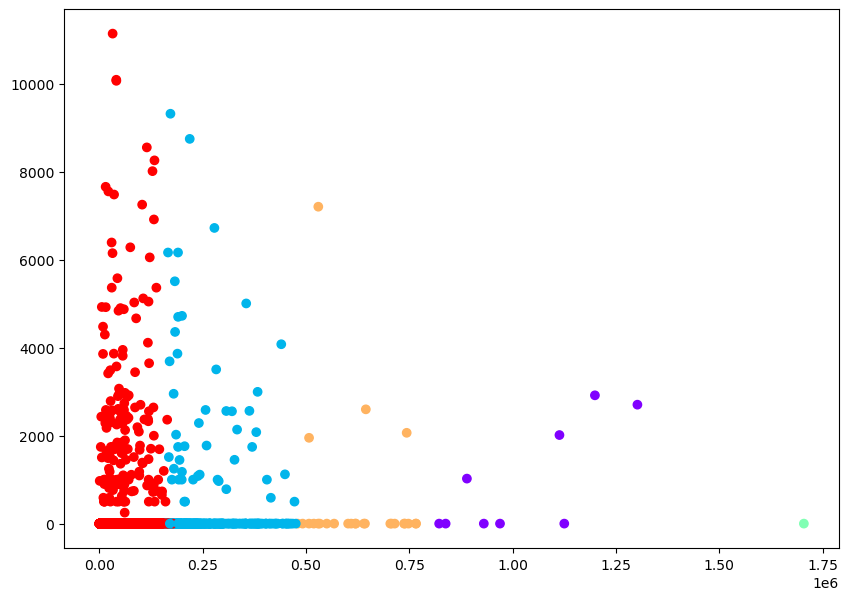

In [199]:
plt.figure(figsize = (10,7))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c = cluster.labels_,cmap='rainbow')

In [200]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x,df['Hierarchical_complete'])
print("Silhouette score of Hierarchical_complete:",score.round(2))

Silhouette score of Hierarchical_complete: 0.69


# KMeans Clustering:

In [201]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 3,n_init = 42 )
df["K_Cluster"] = cluster.fit_predict(x)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_single,Hierarchical_complete,K_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,4,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,4,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,4,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,4,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,4,1


In [202]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x,df["K_Cluster"])
print("Silhouette score of KMeans:",score.round(2))

Silhouette score of KMeans: 0.65


In [203]:
scores =[]
for i in range(2,11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters = i,n_init =20)
    df["K_Cluster"] = cluster.fit_predict(x)
    scores.append(silhouette_score(x,df['K_Cluster']))
scores

[0.7418962153707291,
 0.6488140627870398,
 0.5906749471074476,
 0.5418464180466495,
 0.5153976406355736,
 0.4730868867607641,
 0.4742440450825652,
 0.4417592128202198,
 0.4263140001060122]

# Visualization:

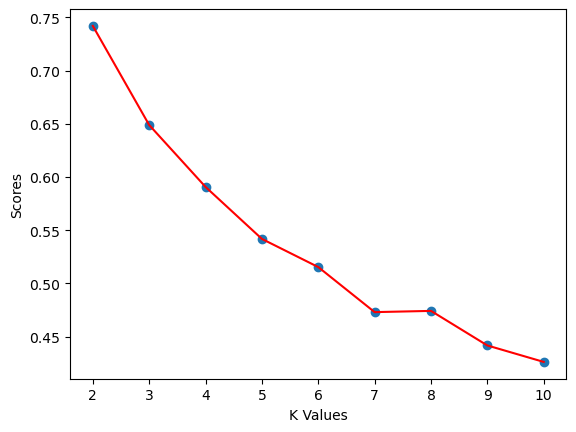

In [204]:
import matplotlib.pyplot as plt
plt.scatter(range(2,11),scores)
plt.plot(range(2,11),scores,color = 'red')
plt.xlabel("K Values")
plt.ylabel("Scores")
plt.show()

# DBSCAN:

In [205]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps =2.5,min_samples =3)
df["Dbscan"] = cluster.fit_predict(SS_X)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_single,Hierarchical_complete,K_Cluster,Dbscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,4,6,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,4,6,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,4,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,4,6,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,4,9,0


In [206]:
from sklearn.cluster import DBSCAN
score = silhouette_score(x,df["Dbscan"])
print("Silhouette score of Dbscan:",score.round(2))

Silhouette score of Dbscan: -0.43


In [207]:
df["Dbscan"].value_counts()

Dbscan
 0    3870
-1      87
 2      23
 1      13
 4       3
 3       3
Name: count, dtype: int64

# Cluster Analysis and Interpretation:

# Evaluation and Performance metrics: